In [1]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('/content/model.bin')
# load model
new_model = Word2Vec.load('/content/model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[ 1.8784306e-03  3.8005665e-03 -2.4996214e-03  4.3002260e-03
 -2.3699317e-03 -1.6997344e-03 -4.0450632e-03 -3.4095484e-03
  1.0260826e-03  7.6881071e-05 -5.5988500e-04  3.5291940e-03
  1.9126703e-03  1.4378997e-03 -3.6721356e-04  2.1067998e-04
 -4.8029022e-03  1.1752911e-03 -3.5622122e-04 -3.5712526e-03
 -2.6712969e-03  1.7165989e-03  4.6056723e-03  2.1443996e-03
  2.4171358e-04  6.9469115e-04 -1.2699836e-03  4.9967803e-03
  1.4268223e-03  3.7399416e-03  4.3600448e-03 -1.8877439e-03
 -1.8311649e-03 -1.9738511e-03  4.7159800e-03  3.2795407e-03
  4.6378840e-03  2.1450070e-03 -4.3817814e-03  3.1406418e-03
  4.6408349e-03 -1.6016342e-03  1.8776952e-03 -1.0451071e-03
  3.6898828e-03 -1.2056399e-03  2.0353955e-03 -2.1737281e-03
  1.8241522e-03  7.2952674e-04 -6.8214303e-04  5.6284812e-04
  3.0528617e-03  3.4104637e-03  9.8727120e-0

In [ ]:
print(model['yet'].shape)

(100,)


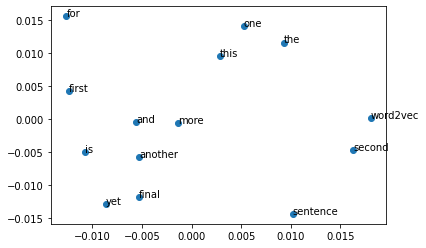

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
result

array([[ 0.00286979,  0.00951976],
       [-0.01072811, -0.00500695],
       [ 0.00929321,  0.01162538],
       [-0.01239771,  0.00431451],
       [ 0.01019972, -0.01436029],
       [-0.01263577,  0.01562129],
       [ 0.01804737,  0.00018632],
       [ 0.01630523, -0.00467602],
       [-0.00863113, -0.0128053 ],
       [-0.00526913, -0.00577106],
       [ 0.0052319 ,  0.01419084],
       [-0.00136168, -0.00064152],
       [-0.00559552, -0.00044339],
       [-0.00532816, -0.01175357]], dtype=float32)

In [11]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
import numpy as np
# define documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]

In [3]:
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[19, 32], [42, 47], [4, 6], [23, 47], [27], [8], [43, 6], [34, 42], [43, 47], [29, 19, 32, 19]]


In [4]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[19 32  0  0]
 [42 47  0  0]
 [ 4  6  0  0]
 [23 47  0  0]
 [27  0  0  0]
 [ 8  0  0  0]
 [43  6  0  0]
 [34 42  0  0]
 [43 47  0  0]
 [29 19 32 19]]


In [5]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [8]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [9]:
# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 8)              400       
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [17]:
# fit the model
model.fit(padded_docs, np.array(labels), epochs=50, verbose=0)

In [18]:
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, np.array(labels), verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 100.000000


In [1]:
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
# define documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]

In [2]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)

In [4]:
vocab_size = len(t.word_index) + 1

In [6]:
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]


In [7]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('/content/drive/My Drive/glove.6B.100d.txt', mode='rt', encoding='utf-8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [14]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [19]:
# define model
model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 100)            1500      
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 401       
Total params: 1,901
Trainable params: 401
Non-trainable params: 1,500
_________________________________________________________________


In [22]:
import numpy
# fit the model
model.fit(padded_docs, numpy.array(labels), epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, numpy.array(labels), verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 100.000000


In [2]:
from zipfile import ZipFile
file_name = "/content/txt_sentoken.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [3]:
import nltk
nltk.download('stopwords')
import string
import re
from os import listdir
from nltk.corpus import stopwords
from pickle import dump
# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text
# turn a doc into clean tokens
def clean_doc(doc):
  # split into tokens by white space
  tokens = doc.split()
  # prepare regex for char filtering
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  # remove punctuation from each word
  tokens = [re_punc.sub('', w) for w in tokens]
  # remove remaining tokens that are not alphabetic
  tokens = [word for word in tokens if word.isalpha()]
  # filter out stop words
  stop_words = set(stopwords.words('english'))
  tokens = [w for w in tokens if not w in stop_words]
  # filter out short tokens
  tokens = [word for word in tokens if len(word) > 1]
  tokens = ' '.join(tokens)
  return tokens
# load all docs in a directory
def process_docs(directory, is_train):
  documents = list()
  # walk through all files in the folder
  for filename in listdir(directory):
    # skip any reviews in the test set
    if is_train and filename.startswith('cv9'):
      continue    
    if not is_train and not filename.startswith('cv9'):
      continue
    # create the full path of the file to open
    path = directory + '/' + filename
    # load the doc
    doc = load_doc(path)
    # clean doc
    tokens = clean_doc(doc)
    # add to list
    documents.append(tokens)
  return documents

# load and clean a dataset
def load_clean_dataset(is_train):
# load documents
  neg = process_docs('/content/txt_sentoken/neg', is_train)
  pos = process_docs('/content/txt_sentoken/pos', is_train)
  docs = neg + pos
  # prepare labels
  labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
  return docs, labels
# save a dataset to file
def save_dataset(dataset, filename):
  dump(dataset, open(filename, 'wb'))
  print('Saved: %s' % filename)
# load and clean all reviews
train_docs, ytrain = load_clean_dataset(True)
test_docs, ytest = load_clean_dataset(False)
# save training datasets
save_dataset([train_docs, ytrain], '/content/train.pkl')
save_dataset([test_docs, ytest], '/content/test.pkl')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Saved: /content/train.pkl
Saved: /content/test.pkl


In [5]:
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
import numpy as np
# load a clean dataset
def load_dataset(filename):
  return load(open(filename, 'rb'))
# fit a tokenizer
def create_tokenizer(lines):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer
# calculate the maximum document length
def max_length(lines):
  return max([len(s.split()) for s in lines])
# encode a list of lines
def encode_text(tokenizer, lines, length):
  # integer encode
  encoded = tokenizer.texts_to_sequences(lines)
  # pad encoded sequences
  padded = pad_sequences(encoded, maxlen=length, padding='post')
  return padded
# define the model
def define_model(length, vocab_size):
# channel 1
  inputs1 = Input(shape=(length,))
  embedding1 = Embedding(vocab_size, 100)(inputs1)
  conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
  drop1 = Dropout(0.5)(conv1)
  pool1 = MaxPooling1D(pool_size=2)(drop1)
  flat1 = Flatten()(pool1)
  # channel 2
  inputs2 = Input(shape=(length,))
  embedding2 = Embedding(vocab_size, 100)(inputs2)
  conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
  drop2 = Dropout(0.5)(conv2)
  pool2 = MaxPooling1D(pool_size=2)(drop2)
  flat2 = Flatten()(pool2)
  # channel 3
  inputs3 = Input(shape=(length,))
  embedding3 = Embedding(vocab_size, 100)(inputs3)
  conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
  drop3 = Dropout(0.5)(conv3)
  pool3 = MaxPooling1D(pool_size=2)(drop3)
  flat3 = Flatten()(pool3)
  # merge
  merged = concatenate([flat1, flat2, flat3])
  # interpretation
  dense1 = Dense(10, activation='relu')(merged)
  outputs = Dense(1, activation='sigmoid')(dense1)
  model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
  # compile
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # summarize
  model.summary()
  plot_model(model, show_shapes=True, to_file='model.png')
  return model
# load training dataset
trainLines, trainLabels = load_dataset('/content/train.pkl')
# create tokenizer
tokenizer = create_tokenizer(trainLines)
# calculate max document length
length = max_length(trainLines)
print('Max document length: %d' % length)
# calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)
# encode data
trainX = encode_text(tokenizer, trainLines, length)
# define model
model = define_model(length, vocab_size)
# fit model
model.fit([trainX,trainX,trainX], np.array(trainLabels), epochs=7, batch_size=16)
# save the model
model.save('/content/model.h5')

Max document length: 1380
Vocabulary size: 44277
Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 1380)]       0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 1380)]       0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1380)]       0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1380, 100)    4427700     input_4[0][0]                    
______________________________________

In [6]:
# load datasets
trainLines, trainLabels = load_dataset('train.pkl')
testLines, testLabels = load_dataset('test.pkl')
# create tokenizer
tokenizer = create_tokenizer(trainLines)
# calculate max document length
length = max_length(trainLines)
# calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Max document length: %d' % length)
print('Vocabulary size: %d' % vocab_size)
# encode data
trainX = encode_text(tokenizer, trainLines, length)
testX = encode_text(tokenizer, testLines, length)
print(trainX.shape, testX.shape)

Max document length: 1380
Vocabulary size: 44277
(1800, 1380) (200, 1380)


In [8]:
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
# load a clean dataset
def load_dataset(filename):
  return load(open(filename, 'rb'))
# fit a tokenizer
def create_tokenizer(lines):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer
# calculate the maximum document length
def max_length(lines):
  return max([len(s.split()) for s in lines])
# encode a list of lines
def encode_text(tokenizer, lines, length):
  # integer encode
  encoded = tokenizer.texts_to_sequences(lines)
  # pad encoded sequences
  padded = pad_sequences(encoded, maxlen=length, padding='post')
  return padded
# load datasets
trainLines, trainLabels = load_dataset('/content/train.pkl')
testLines, testLabels = load_dataset('/content/test.pkl')
# create tokenizer
tokenizer = create_tokenizer(trainLines)
# calculate max document length
length = max_length(trainLines)
print('Max document length: %d' % length)
# calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)
# encode data
trainX = encode_text(tokenizer, trainLines, length)
testX = encode_text(tokenizer, testLines, length)
# load the model
model = load_model('/content/model.h5')
# evaluate model on training dataset
_, acc = model.evaluate([trainX,trainX,trainX], np.array(trainLabels), verbose=0)
print('Train Accuracy: %.2f' % (acc*100))
# evaluate model on test dataset dataset
_, acc = model.evaluate([testX,testX,testX], np.array(testLabels), verbose=0)
print('Test Accuracy: %.2f' % (acc*100))

Max document length: 1380
Vocabulary size: 44277
Train Accuracy: 100.00
Test Accuracy: 89.00
